In [ ]:
# This is a notebook for the 2022 Advent of Code

#######
# Day 1
#######

In [ ]:
# Read the data in from the file
def get_data(): 
  with open("input_day1.txt", "r") as txt_file:
    return txt_file.readlines()

data=get_data()
data.append('\n') # this is to make sure the last line is read


In [ ]:
# read input_day1.txt and return a list of strings
# each elf has a board with a list of ingredients caloric values
def boards(data):
  boards=[]
  board=[]
  for line in data:
    if line == '\n':
      boards.append(board)
      board=[]
    else:
      board.append(line.strip())
  return boards

# the the elfs boards with the calories of their items
all_the_boards = boards(data)

# find the board with the most calories
def find_max_calories(all_the_boards):
  elf_cal=[]
  max_calories = 0
  for board in all_the_boards:
    calories = 0
    for item in board:
      calories += int(item)
    elf_cal.append(calories)
    if calories > max_calories:
      max_calories = calories
  return max_calories,elf_cal

# find the board with the most calories
max_calories, elf_cal = find_max_calories(all_the_boards)

print(max_calories)


In [ ]:
elf_cal_sorted = sorted(elf_cal, reverse=True)

In [ ]:
total_first_3 = elf_cal_sorted[0] + elf_cal_sorted[1] + elf_cal_sorted[2]
print(total_first_3)

# Day 2 #
# rock paper scisors tournament
#########

In [ ]:
# opponent
# A for rock
# B for paper
# C for scissors

# my plays
# X for rock
# Y for paper
# Z for scissors

# 1 point for rock
# 2 points for paper
# 3 points for scissors
# 0 if you lose / 3 for a draw / 6 for a win

# The function to check the strategy and calculate scores
# for part 1 of the problem
def test_strategy(strategy):
  points_for_my_play = {'X':1,'Y':2,'Z':3}
  points_for_my_result = {'lose':0,'draw':3,'win':6}
  score =0

  # go through the steps of the strategy
  for steps in strategy:
    opponent = steps[0]
    my_play = steps[1]

    # calculate the result
    # if my play was Rock
    if my_play=='X':
      if opponent=='A':
        result = 'draw'
        points_for_this_play = points_for_my_result['draw']+points_for_my_play['X']
        score += points_for_this_play
        
      elif opponent=='B':
        result = 'lose'
        points_for_this_play = points_for_my_result['lose']+points_for_my_play['X']
        score += points_for_this_play
        
      elif opponent=='C':
        result = 'win'
        points_for_this_play= points_for_my_result['win']+points_for_my_play['X']
        score += points_for_this_play
        
    # if my play was Paper
    elif my_play=='Y':
      if opponent=='A':
        result = 'win'
        points_for_this_play= points_for_my_result['win']+points_for_my_play['Y']
        score += points_for_this_play
        
      elif opponent=='B':
        result = 'draw'
        points_for_this_play= points_for_my_result['draw']+points_for_my_play['Y']
        score += points_for_this_play
        
      elif opponent=='C':
        result = 'lose'
        points_for_this_play= points_for_my_result['lose']+points_for_my_play['Y']
        score += points_for_this_play
        
    # if my play was Scissors
    elif my_play=='Z':
      if opponent=='A':
        result = 'lose'
        points_for_this_play= points_for_my_result['lose']+points_for_my_play['Z']
        score += points_for_this_play
        
      elif opponent=='B':
        result = 'win'
        points_for_this_play= points_for_my_result['win']+points_for_my_play['Z']
        score += points_for_this_play
        
      elif opponent=='C':
        result = 'draw'
        points_for_this_play= points_for_my_result['draw']+points_for_my_play['Z']
        score += points_for_this_play

    print(opponent, my_play, result, points_for_this_play)    

  # print the score
  print(f'Total Score is :{score}')




In [ ]:
# Checking my code for the example provided in the problem
strategy =[['A','Y'],['B','X'],['C','Z']]
test_strategy(strategy)

In [ ]:
# Loading my actual file and creating a strategy from it
with open("input_day2.txt", "r") as txt_file:
  data = txt_file.readlines()

strategy =[]
for line in data:
  strategy.append(line.strip().split(' '))

test_strategy(strategy) 

In [ ]:
strategy

In [ ]:
# opponent
# A for rock
# B for paper
# C for scissors

# my plays
# X for i need to lose
# Y for it needs to be a draw
# Z for i need to win

# 1 point for rock
# 2 points for paper
# 3 points for scissors
# 0 if you lose / 3 for a draw / 6 for a win

# The function to check the strategy and calculate scores
# for part 1 of the problem
def test_strategy_part2(strategy):
  points_for_my_play = {'X':1,'Y':2,'Z':3}
  points_for_my_result = {'lose':0,'draw':3,'win':6}
  score =0

  # go through the steps of the strategy
  for steps in strategy:
    opponent = steps[0]
    my_play = steps[1]

    # calculate the result
    if opponent=='A': # if opponent is rock
      if my_play=='X':  # if i need to lose therefore being scissors
        result = 'lose'
        points_for_this_play = points_for_my_result['lose']+points_for_my_play['Z']
        score += points_for_this_play
        
      elif my_play=='Y': # if i need to draw therefore being rock as well
        result = 'draw'
        points_for_this_play = points_for_my_result['draw']+points_for_my_play['X']
        score += points_for_this_play
        
      elif my_play=='Z': 
        result = 'win'
        points_for_this_play= points_for_my_result['win']+points_for_my_play['Y']
        score += points_for_this_play
    
    elif opponent=='B': # if opponent is paper
      if my_play=='X': # if i need to lose therefore being rock
        result = 'lose'
        points_for_this_play= points_for_my_result['lose']+points_for_my_play['X']
        score += points_for_this_play
        
      elif my_play=='Y': # if i need to draw therefore being paper as well
        result = 'draw' 
        points_for_this_play= points_for_my_result['draw']+points_for_my_play['Y']
        score += points_for_this_play
        
      elif my_play=='Z': # if i need to win therefore being scissors
        result = 'win'
        points_for_this_play= points_for_my_result['win']+points_for_my_play['Z']
        score += points_for_this_play

    elif opponent=='C': # if opponent is scissors
      if my_play=='X': # if i need to lose therefore being paper
        result = 'lose'
        points_for_this_play= points_for_my_result['lose']+points_for_my_play['Y']
        score += points_for_this_play
        
      elif my_play=='Y': # if i need to draw therefore being scissors as well
        result = 'draw'
        points_for_this_play= points_for_my_result['draw']+points_for_my_play['Z']
        score += points_for_this_play
        
      elif my_play=='Z': # if i need to win therefore being rock
        result = 'win'
        points_for_this_play= points_for_my_result['win']+points_for_my_play['X']
        score += points_for_this_play
        




    print(opponent, my_play, result, points_for_this_play)    

  # print the score
  print(f'Total Score is :{score}')



In [ ]:
# this is to test my function for the example provided in the problem
strategy2 =[['A','Y'],['B','X'],['C','Z']]
test_strategy_part2(strategy2)

In [ ]:
# running my function with the data from the file
# Loading my actual file and creating a strategy from it

with open("input_day2.txt", "r") as txt_file:
  data = txt_file.readlines()

strategy =[]
for line in data:
  strategy.append(line.strip().split(' '))


test_strategy_part2(strategy)

#########
# Day 3 #
#########

In [ ]:
# each ruksack has 2 compartments
# there is the same amount of items in each compartment
# first half is for the first compartment
# second half is for the second compartment

# Part 1

# rucksacks = ['vJrwpWtwJgWrhcsFMMfFFhFp','jqHRNqRjqzjGDLGLrsFMfFZSrLrFZsSL','PmmdzqPrVvPwwTWBwg','wMqvLMZHhHMvwLHjbvcjnnSBnvTQFn','ttgJtRGJQctTZtZT','CrZsJsPPZsGzwwsLwLmpwMDw']

import string
alphabet_lowercase = string.ascii_lowercase
alphabet_uppercase = string.ascii_uppercase


with open("input_day3.txt", "r") as txt_file:
  data = txt_file.readlines()

rucksacks =[]
for line in data:
  rucksacks.append(line.strip())



def find_common(first_compartment, second_compartment):
  common = []
  for i in first_compartment:
    if i in second_compartment:
      common.append(i)
  return common

def score_common(common):
  score = 0
  if len(common)>0:
      if common[0].isupper():
        place_value = alphabet_uppercase.find(common[0])
        score = place_value +1 + 26 # 26 is the place value of A and +1 because the place value starts at 0
      else:
        place_value = alphabet_lowercase.find(common[0])
        score = place_value + 1 # +1 because the index starts at 0
  
  return score

def do_the_rucksaks(rucksacks):
  total_score=0
  for i in rucksacks:
    first_compartment = i[:len(i)//2]
    second_compartment = i[len(i)//2:]
    this_one = score_common(find_common(first_compartment,second_compartment))
    print(f'The score is :{this_one}')
    total_score += this_one
  print(f'The total score for part 1 is :{total_score}')


do_the_rucksaks(rucksacks)



In [ ]:
# Elves are in groups of 3
# split the rucksacks in groups of 3

# rucksacks = ['vJrwpWtwJgWrhcsFMMfFFhFp','jqHRNqRjqzjGDLGLrsFMfFZSrLrFZsSL','PmmdzqPrVvPwwTWBwg','wMqvLMZHhHMvwLHjbvcjnnSBnvTQFn','ttgJtRGJQctTZtZT','CrZsJsPPZsGzwwsLwLmpwMDw']

with open("input_day3.txt", "r") as txt_file:
  data = txt_file.readlines()

rucksacks =[]
for line in data:
  rucksacks.append(line.strip())



def split_rucksacks(rucksacks): #this is to split the rucksacks in groups of 3
  rucksacks_groups =[]
  for i in range(0,len(rucksacks),3):
    rucksacks_groups.append(rucksacks[i:i+3])
  return rucksacks_groups

rucksacks_groups = split_rucksacks(rucksacks)

# find the common letters in each ruksack
def find_common_in_rucksack(rucksack1,rucksack2,rucksack3):
  common = []
  for i in rucksack1:
    if i in rucksack2 and i in rucksack3:
      common.append(i)
  return common

def score_common(common):
  score = 0
  if len(common)>0:
      if common[0].isupper():
        place_value = alphabet_uppercase.find(common[0])
        score = place_value +1 + 26 # 26 is the place value of A and +1 because the place value starts at 0
      else:
        place_value = alphabet_lowercase.find(common[0])
        score = place_value + 1 # +1 because the index starts at 0
  
  return score


total_score = 0
for group in rucksacks_groups:
  common = find_common_in_rucksack(group[0],group[1],group[2])
  print(f'The common letters are :{common}')
  score = score_common(common)
  print(f'The score is :{score}')
  total_score+=score

print(f'The total score for part 2 is :{total_score}')

# Day 4

In [ ]:
# load the data from the file or use the example provided in the problem

# assignments = ['2-4,6-8', '2-3,4-5', '5-7,7-9', '2-8,3-7', '6-6,4-6', '2-6,4-8']

with open("input_day4.txt", "r") as txt_file:
  data = txt_file.readlines()

assignments =[]
for line in data:
  assignments.append(line.strip())



In [ ]:
# the functions to check if the assigned space is contained in the other elf range

def check_if_first_in_second(first_elf_start,first_elf_end,second_elf_start,second_elf_end):
  if first_elf_start >= second_elf_start and first_elf_end <= second_elf_end:
    return 1
  else:
    return 0

def check_if_second_in_first(first_elf_start,first_elf_end,second_elf_start,second_elf_end):
  if second_elf_start >= first_elf_start and second_elf_end <= first_elf_end:
    return 1
  else:
    return 0

def check_if_overlap(first_elf_start,first_elf_end,second_elf_start,second_elf_end):
  if first_elf_start <= second_elf_start and first_elf_end >= second_elf_start:
    return 1
  elif first_elf_start <= second_elf_end and first_elf_end >= second_elf_end:
    return 1
  elif second_elf_start <= first_elf_start and second_elf_end >= first_elf_start:
    return 1
  elif second_elf_start <= first_elf_end and second_elf_end >= first_elf_end:
    return 1
  else:
    return 0

def part1():
  # Start the scan
  score =0
  for i in range(len(assignments)):
    first_elf = assignments[i].split(',')[0]
    second_elf = assignments[i].split(',')[1]

    first_elf_start = int(first_elf.split('-')[0])
    first_elf_end = int(first_elf.split('-')[1])

    second_elf_start = int(second_elf.split('-')[0])
    second_elf_end = int(second_elf.split('-')[1])

    if first_elf_start == second_elf_start and first_elf_end == second_elf_end:
      score += 1
    else:
      score += check_if_first_in_second(first_elf_start,first_elf_end,second_elf_start,second_elf_end)
      score += check_if_second_in_first(first_elf_start,first_elf_end,second_elf_start,second_elf_end)

  print(f'There is {score} enclosing pairs')

def part2():
  # Start the scan
  score =0
  for i in range(len(assignments)):
    first_elf = assignments[i].split(',')[0]
    second_elf = assignments[i].split(',')[1]

    first_elf_start = int(first_elf.split('-')[0])
    first_elf_end = int(first_elf.split('-')[1])

    second_elf_start = int(second_elf.split('-')[0])
    second_elf_end = int(second_elf.split('-')[1])

    if first_elf_start == second_elf_start and first_elf_end == second_elf_end:
      score += 1
    else:
      score += check_if_overlap(first_elf_start,first_elf_end,second_elf_start,second_elf_end)

  print(f'There is {score} overlapping pairs')


part1()
part2()

# . day 5
#######

In [ ]:
# Creating the stacks data from the input file
# Part 1 with the Crane model 9000...
with open("input_day5_stacks.txt", "r") as txt_file:
  data = txt_file.readlines()


def process(line): # process each line to match a template format, so the matrix is square
  pattern = '[#] ' *9
  new_line=''
  for i in range(len(line)):
    if line[i] != pattern[i] and line[i] == ' ':
      new_line += pattern[i]
    else:
      new_line += line[i]
      
  return new_line

stacks =[] # a temporary list to store the stacks in a "line basis"
for line in data:
  t = process(line) #get each line
  t = t.replace('[', '') # remove un-necessary characters
  t = t.replace(']', '') # remove un-necessary characters
  t = t.replace('\n', '') # remove un-necessary characters
  t =t.split(' ') # split the string into a list
  stacks.append(t) # add the first 17 characters to the list


# Transpose the data so that i get the columns
real_stacks =[] # a list to store the stacks in a "stack basis"
for s in range(0,9):
  this_stack=[]
  for i in range(0,8):
    line = stacks[7-i]
    # print(f'Row {7-i} : {line}')
    if line[s] != '#':
      this_stack.append(line[s])
  real_stacks.append(this_stack)


## Data is now in the real_stacks list

def draw_the_stack():
  # print the stacks
  for s in range(0,9):
    print(f'Stack {s+1} is now : {real_stacks[s]}')

def move(how_many,from_stack,to_stack):
  # move the number of items from the from_stack to the to_stack
  for i in range(0,how_many):
    real_stacks[to_stack-1].append(real_stacks[from_stack-1].pop())


def message():
  # print the message
  t=''
  for i in range(0,9):
    l = len(real_stacks[i])
    t += real_stacks[i][l-1]
  print(f'The message on top of the crates is :{t}')

# Load the moves data
with open("input_day5_moves.txt", "r") as txt_file:
  data = txt_file.readlines()

the_moves=[]
# Process the moves
for line in data:
  t= line.replace('move ', '')
  t= t.replace(' from ', ',')
  t= t.replace(' to ', ',')
  the_moves.append(t)

# Part 1
print('This is for part 1')
for i in range(len(the_moves)):
  how_many = int(the_moves[i].split(',')[0])
  from_stack = int(the_moves[i].split(',')[1])
  to_stack = int(the_moves[i].split(',')[2])
  move(how_many,from_stack,to_stack)

# draw_the_stack()
message()


In [ ]:
# Creating the stacks data from the input file
# Part 2 with the Crane model 9001...
with open("input_day5_stacks.txt", "r") as txt_file:
  data = txt_file.readlines()


def process(line): # process each line to match a template format, so the matrix is square
  pattern = '[#] ' *9
  new_line=''
  for i in range(len(line)):
    if line[i] != pattern[i] and line[i] == ' ':
      new_line += pattern[i]
    else:
      new_line += line[i]
      
  return new_line

stacks =[] # a temporary list to store the stacks in a "line basis"
for line in data:
  t = process(line) #get each line
  t = t.replace('[', '') # remove un-necessary characters
  t = t.replace(']', '') # remove un-necessary characters
  t = t.replace('\n', '') # remove un-necessary characters
  t =t.split(' ') # split the string into a list
  stacks.append(t) # add the first 17 characters to the list


# Transpose the data so that i get the columns
real_stacks =[] # a list to store the stacks in a "stack basis"
for s in range(0,9):
  this_stack=[]
  for i in range(0,8):
    line = stacks[7-i]
    # print(f'Row {7-i} : {line}')
    if line[s] != '#':
      this_stack.append(line[s])
  real_stacks.append(this_stack)


## Data is now in the real_stacks list

def draw_the_stack():
  # print the stacks
  for s in range(0,9):
    print(f'Stack {s+1} is now : {real_stacks[s]}')

def move_9001(how_many, from_stack, to_stack):
  # move the number of items from the from_stack to the to_stack
  temp = real_stacks[from_stack-1][-how_many:]
  for i in temp:
    real_stacks[to_stack-1].append(i)
    real_stacks[from_stack-1].pop()



def message():
  # print the message
  t=''
  for i in range(0,9):
    l = len(real_stacks[i])
    t += real_stacks[i][l-1]
  print(f'The message on top of the crates is :{t}')

# Load the moves data
with open("input_day5_moves.txt", "r") as txt_file:
  data = txt_file.readlines()

the_moves=[]
# Process the moves
for line in data:
  t= line.replace('move ', '')
  t= t.replace(' from ', ',')
  t= t.replace(' to ', ',')
  the_moves.append(t)

# Part 2
print('This is for part 2')
for i in range(len(the_moves)):
  how_many = int(the_moves[i].split(',')[0])
  from_stack = int(the_moves[i].split(',')[1])
  to_stack = int(the_moves[i].split(',')[2])
  move_9001(how_many,from_stack,to_stack)

# draw_the_stack()
message()

# Day 6

In [ ]:
# this is the data in the example
data_stream = 'mjqjpqmgbljsphdztnvjfqwrcgsmlb'
data_stream ='bvwbjplbgvbhsrlpgdmjqwftvncz'
data_stream = 'nppdvjthqldpwncqszvftbrmjlhg'
data_stream = 'nznrnfrfntjfmvfwmzdfjlvtqnbhcprsg'
data_stream = 'zcfzfwzzqfrljwzlrfnpqdbhtmscgvjw'

In [ ]:
# Part 1
# Load the data from the puzzle
with open("input_day6.txt", "r") as txt_file:
  data = txt_file.readlines()

data_stream = data[0].strip()

def find_marker(data_stream):
  for i in range(len(data_stream)-3):
    packet = data_stream[i]+data_stream[i+1]+data_stream[i+2]+data_stream[i+3]
    if data_stream[i]!=data_stream[i+1] and data_stream[i+1]!=data_stream[i+2] and data_stream[i+2]!=data_stream[i+3] and data_stream[i]!=data_stream[i+2] and data_stream[i]!=data_stream[i+3] and data_stream[i+1]!=data_stream[i+3]:
      answer = f'Found a Marker : {packet} when we are at position {i+4}'
      return answer

find_marker(data_stream)

In [ ]:
data_stream ='mjqjpqmgbljsphdztnvjfqwrcgsmlb'
data_stream ='bvwbjplbgvbhsrlpgdmjqwftvncz'
data_stream ='nppdvjthqldpwncqszvftbrmjlhg'
data_stream = 'nznrnfrfntjfmvfwmzdfjlvtqnbhcprsg'

In [ ]:
# Part 2
with open("input_day6.txt", "r") as txt_file:
  data = txt_file.readlines()

data_stream = data[0].strip()

def get_message_packet(data_stream):
  for i in range(len(data_stream)-13):
    packet=''
    for j in range(14):
      packet+=data_stream[i+j]
    if check_if_message(packet):
      print(packet, check_if_message(packet), i+14)
      break

def check_if_message(packet):
  for c in packet:
    if packet.count(c) > 1:
      return False
  return True

get_message_packet(data_stream)

# Day 7

In [ ]:
# use this to load the data either the example or the real data
with open("input_day7.txt", "r") as txt_file:
  data = txt_file.readlines()

all_cmd =[]
for line in data:
  all_cmd.append(line.strip())
  

In [ ]:
# assuming that the computer is top of the tree
#and that all the commands are loaded into the all_cmd variable

class Directory:
  def __init__(self, name, parent):
    self.name = name
    self.files = []
    self.directories = []
    self.parent = parent

  def sub_directories(self):
    sub_directories = {directory.name:directory for directory in self.directories}
    return sub_directories

  def size(self):
    size = 0
    for file in self.files:
      size += file.size
    for directory in self.directories:
      size += directory.size()
    return size

class File:
  def __init__(self, name, size):
    self.name = name
    self.size = size

class Computer:
  def __init__(self):
    self.root = Directory('/', None)
    self.cwd = self.root
    self.data = all_cmd

  def space(self):
    return self.root.size()

  def ls(self,line):
    if line.startswith('dir'): # we are getting a directory name
      self.cwd.directories.append(Directory(line[4:], self.cwd))
    else:
      size,name = line.split() # we are getting a file name and size
      self.cwd.files.append(File(name, int(size)))

  def cd(self,directory_name):
    if directory_name == '..': # go up one directory
      if self.cwd != self.root: # don't go above the root
        self.cwd = self.cwd.parent 
    elif directory_name == '/': # go to the root
      self.cwd = self.root
    else: # it must be that we are going to a sub directory (no checking for errors)
      self.cwd = self.cwd.sub_directories()[directory_name]  

  def process_cmd(self):
    for line in self.data:
      if line.startswith('$ ls'): # ignore as the real information comes afterwards 
        continue

      elif line.startswith('$ cd'): # change directory
        directory = line.split()[-1]
        self.cd(directory)
        
      else: # must be a file or directory
        self.ls(line)


# Create a data model object for the computer and its files and directories
my_computer = Computer()
my_computer.process_cmd() # load the data into the data model
total_used = my_computer.space() # get the total used space
print(f'Total used space {total_used}')

# Find all the folders and and files that are on the system
def print_name_size(node):
  for n in node:
    # print(n.name, n.size())
    list.append([n.name, n.size()])
    print_name_size(n.directories) # recursive to go down the tree
  return list

# us a global variable to store the list of files and size
list =[]
print_name_size(my_computer.root.directories) # call the recursive function 

# find the total size of the files and folders that are less than 100000
total_sum=0
for i in range(len(list)):
  if list[i][1] <= 100000:
    # print(list[i])
    total_sum+=list[i][1]
print(f'The sum for Part 1 is :{total_sum}')

print()
print()
print()
print('Part 2 :')
disk_space = 70000000
required = 30000000
total_free = disk_space-total_used
print(f'Total free is {total_free} and required is {required}')
need_to_free = required - total_free
print(f'Need to free a minimum of {need_to_free} to get {required} free')
print()
# There might be more than one candidate and the first one might not be the smallest
candidates=[]
for i in range(len(list)):
  
  if int(list[i][1]) >= int(need_to_free):
    print(list[i],'is good')
    candidates.append(list[i][1])

print()
sorted_candidates = sorted(candidates) # sort the candidates to find the smallest
print(f'The smallest candidate is {sorted_candidates[0]}')

In [ ]:
a= {1,2,3,4,5,6,7,8,9,10}
b = { 2*c for c in a}
print(b)

# Day 8

In [99]:
# Part 1
with open("input_day8.txt", "r") as txt_file:
  data = txt_file.readlines()

for i in range(len(data)):
  data[i] = data[i].strip()


In [34]:
number_of_column_trees = len(data[0])
number_of_row_trees = len(data)
number_of_perimeter_trees = 2 * number_of_column_trees + 2*(number_of_row_trees - 2)

print(f'There is { number_of_perimeter_trees} perimeter trees')

# Keep ing track of the list of tress is an overkill but might be helpful for part 2 ?
# Also not very efficient in general...
def test_tree(size,i,j):
  up=[]
  down=[]
  left=[]
  right=[]
  check=0
  visible_in_this_direction=0
  overall_visible = 0
  # print(f'Checking {size} at {i},{j}')
  
  visible_in_this_direction=1
  for k in range(0,i):
    check = int(data[k][j])
    up.append(check)
    if check >= size:
      visible_in_this_direction =0
      break
  # print(f'Up is :{up} and therefore {visible_in_this_direction}')
  overall_visible += visible_in_this_direction

  visible_in_this_direction=1
  for k in range(i+1,len(data)):
    check = int(data[k][j])
    down.append(check)
    if check >= size:
      visible_in_this_direction =0
      break
  # print(f'Down is :{down} and therefore {visible_in_this_direction}')
  overall_visible += visible_in_this_direction

  visible_in_this_direction=1
  for k in range(0,j):
    check = int(data[i][k])
    left.append(check)
    if check >= size:
      visible_in_this_direction =0
      break
  # print(f'Left is :{left} and therefore {visible_in_this_direction}')
  overall_visible += visible_in_this_direction

  visible_in_this_direction=1
  for k in range(j+1,len(data[i])):
    check = int(data[i][k])
    right.append(check)
    if check >= size:
      visible_in_this_direction =0
      break
  # print(f'Right is :{right} and therefore {visible_in_this_direction}')
  overall_visible += visible_in_this_direction

  if overall_visible  > 0:
    overall_visible = 1
  
  # print(f'Overall visible is {overall_visible}')
  # print()
  return overall_visible
  

# Go through all the inside trees
count_visible = 0
for i in range(1,len(data)-1):
  for j in range(1,len(data[i])-1):
    tree_size = int(data[i][j])
    # print(tree_size, test_tree(tree_size,i,j))
    count_visible += test_tree(tree_size,i,j)

print(f' and {count_visible} visible trees inside')
print(f'There is { number_of_perimeter_trees + count_visible} trees visbile in total')


There is 392 perimeter trees
 and 1141 visible trees inside
There is 1533 trees visbile in total


In [95]:
#part 2
# scenic scoring is the number of trees visible from a given point in all four directions
# the scoring is the sum of the number of trees visible in each direction
# i could re-use a fair amount of code but had to change the direction of looping and keep a track of the number of trees visible in each direction


def scenic_scoring(size,i,j, debug):
  up=[]
  down=[]
  left=[]
  right=[]
  check=0
  visible_in_this_direction=0
  overall_visible = 0
  if debug: 
    print(f'Checking {size} at {i},{j}')
  
  # Check up
  visible_in_this_direction=0
  for k in range(i-1, -1,-1):
    check = int(data[k][j])
    up.append(check)
    if check >= size:
      visible_in_this_direction += 1
      break
    else:
      visible_in_this_direction += 1
  if debug:
    print(f'Up is :{up} and therefore {visible_in_this_direction}')
  overall_visible = visible_in_this_direction

  # Check Down
  visible_in_this_direction=0
  for k in range(i+1,len(data)):
    check = int(data[k][j])
    down.append(check)
    if check >= size:
      visible_in_this_direction += 1
      break
    else:
      visible_in_this_direction += 1
  if debug:
    print(f'Down is :{down} and therefore {visible_in_this_direction}')
  overall_visible *= visible_in_this_direction

  # Check Left
  visible_in_this_direction=0
  for k in range(j-1, -1, -1):
    check = int(data[i][k])
    left.append(check)
    if check >= size:
      visible_in_this_direction += 1
      break
    else:
      visible_in_this_direction += 1
  if debug:
    print(f'Left is :{left} and therefore {visible_in_this_direction}')
  overall_visible *= visible_in_this_direction

  # Check Right
  visible_in_this_direction=0
  for k in range(j+1,len(data[i])):
    check = int(data[i][k])
    right.append(check)
    if check >= size:
      visible_in_this_direction += 1
      break
    else:
      visible_in_this_direction += 1
  if debug:
    print(f'Right is :{right} and therefore {visible_in_this_direction}')
  overall_visible *= visible_in_this_direction

  if debug:
    print(f'Overall Scenic Score is {overall_visible}')
    print()
  return overall_visible



In [100]:

# Go through all the inside trees
max_scenic_score = 0
for i in range(1,len(data)-1): # for each row
  for j in range(1,len(data[i])-1): # for each column
    tree_size = int(data[i][j])
    new_scenic_score = scenic_scoring(tree_size,i,j,False)
    if new_scenic_score > max_scenic_score:
      max_scenic_score = new_scenic_score

print(f'The maximum scenic score is {max_scenic_score}')

The maximum scenic score is 345744


In [73]:
data

['30373', '25512', '65332', '33549', '35390']

In [97]:
location_row = 3
location_column = 2
size = int(data[location_row][location_column])
print(size)
scenic_scoring(size,location_row,location_column,True)

5
Checking 5 at 3,2
Up is :[3, 5] and therefore 2
Down is :[3] and therefore 1
Left is :[3, 3] and therefore 2
Right is :[4, 9] and therefore 2
Overall Scenic Score is 8



8

In [72]:
data

['30373', '25512', '65332', '33549', '35390']

# Day 9

In [172]:
# Part 1
with open("input_day9.txt", "r") as txt_file:
  data = txt_file.readlines()

for i in range(len(data)):
  data[i] = data[i].strip()


In [55]:
data

['R 4', 'U 4', 'L 3', 'D 1', 'R 4', 'D 1', 'L 5', 'R 2']

Number of points overall for the tail is 9218
Number of unique points is 6642
Zoom is 7
size of drawing is 327 x 555
Canvas is 5000 x 5000
Min X is -137 and Max X is 190
Min Y is -477 and Max Y is 78


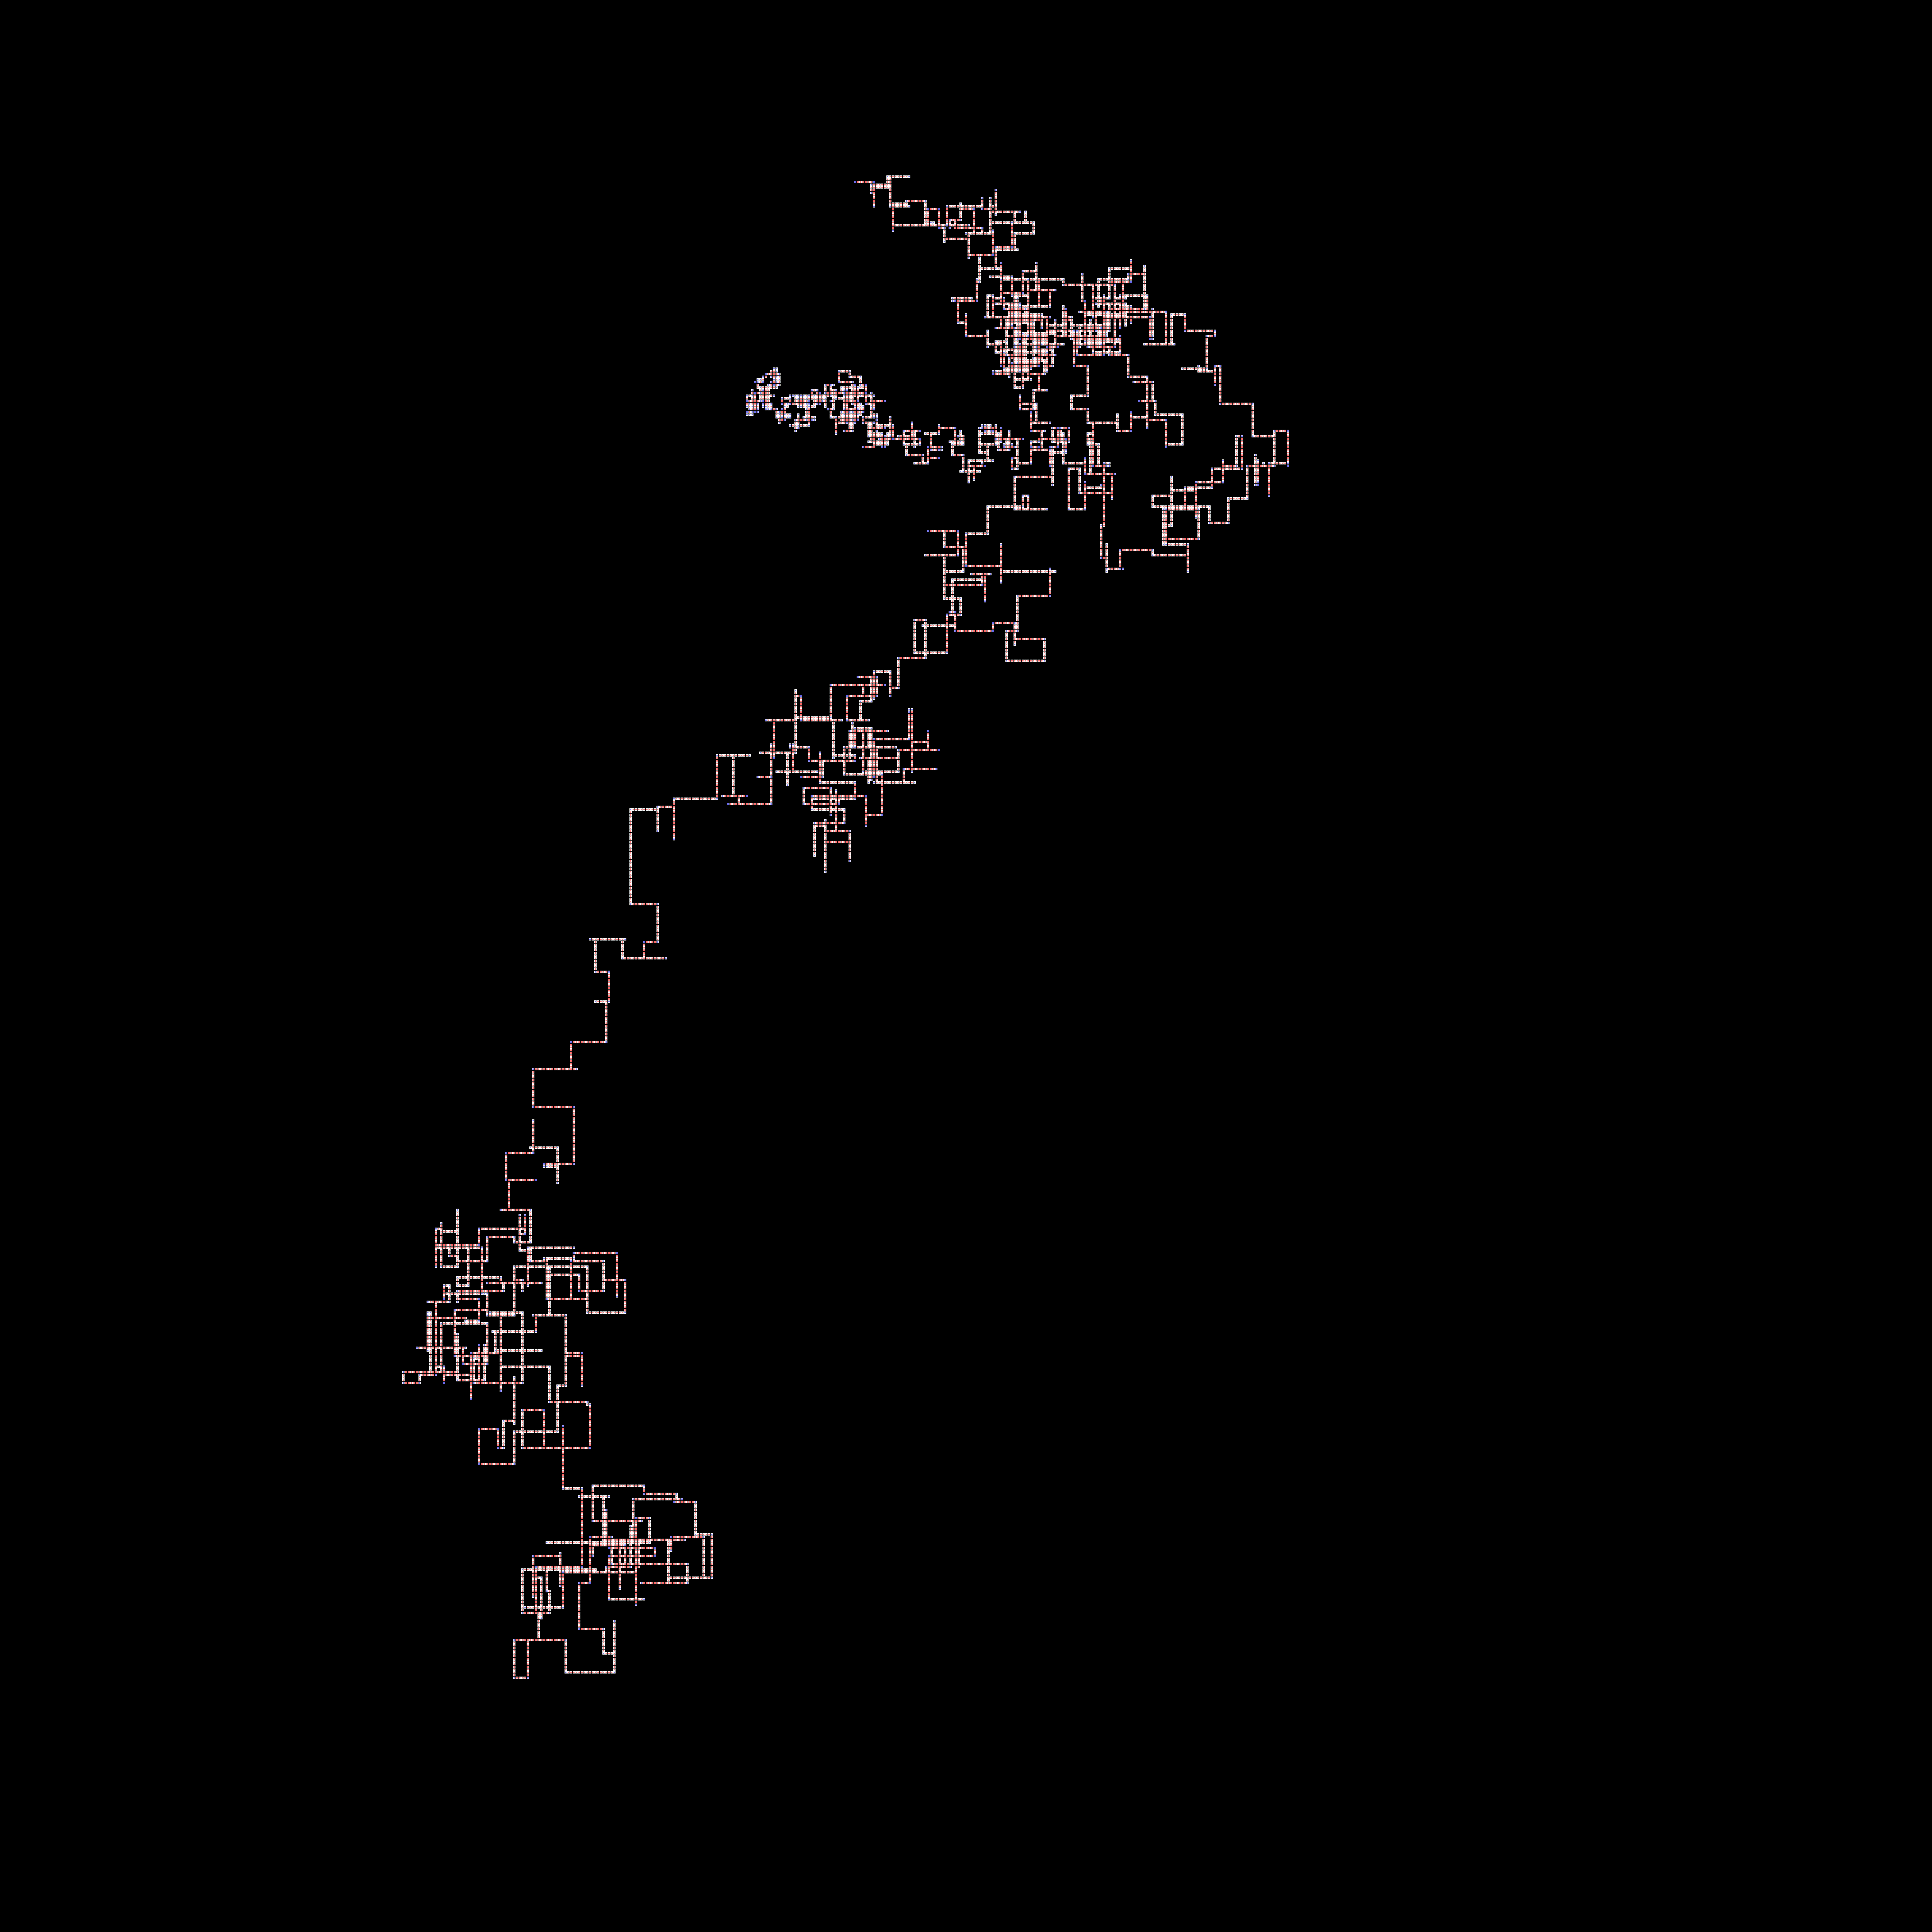

In [177]:
import PIL.ImageDraw as ImageDraw
import PIL.Image as Image
import PIL.ImageFilter as ImageFilter
import random, math
import time


width_line = 5
start_x = 0
start_y = 0
points = [[start_x,start_y]] # This keeps a track of the head of the rope
tail_points =[[start_x,start_y]] # This keeps a track of the tail of the rope, and starts at same place as head
zoom= 0
padding = 2
canvas_x = 5000
canvas_y = 5000

# this is un necessary but I wanted to see the rope as it was being drawn, at least the head of it
image = Image.new("RGB", (canvas_x, canvas_y))
draw = ImageDraw.Draw(image)


def make_a_move(dir,steps,x,y): # This takes a direction and a number of steps and returns the new x and y
  global points, tail_points
  current_tail = tail_points[-1] # This is the current tail
  if dir == 'R':
    for i in range(steps):
      x += 1
      new_x = x
      new_y = y
      points.append([new_x,new_y])
      # now need to test if tail needs to be moved
      if (x - current_tail[0]) > 1:
        tail_points.append(points[-2])
        
      
  elif dir == 'L':
    for i in range(steps):
      x -= 1
      new_x = x
      new_y = y
      points.append([new_x,new_y])
      # now need to test if tail needs to be moved
      if (current_tail[0]-x) > 1:
        tail_points.append(points[-2])
      
    
  elif dir == 'U':
    for i in range(steps):
      y += 1
      new_x = x
      new_y = y
      points.append([new_x,new_y])
      # now need to test if tail needs to be moved
      if (y - current_tail[1]) > 1:
        tail_points.append(points[-2])

    
  elif dir == 'D':
    for i in range(steps):
      y -= 1
      new_x = x
      new_y = y
      points.append([new_x,new_y])
      # now need to test if tail needs to be moved
      if (current_tail[1]-y) > 1:
        tail_points.append(points[-2])


  return new_x, new_y

def decode(move): # This takes a move and decodes it into a direction and a number of steps
  direction = move[0]
  steps = int(move[1:])
  return direction, steps

def find_dim():
  global points
  min_x = 0
  max_x = 0
  min_y = 0
  max_y = 0
  for i in points:
    if i[0] < min_x:
      min_x = i[0]
    if i[0] > max_x:
      max_x = i[0]
    if i[1] < min_y:
      min_y = i[1]
    if i[1] > max_y:
      max_y = i[1]
  width_x = max_x - min_x
  width_y = max_y - min_y
  return min_x, max_x, min_y, max_y, width_x, width_y

  
# Create all the points from the data
for i in data:
  direction, steps = decode(i)
  start_x, start_y = make_a_move(direction,steps,start_x,start_y)

# Points contains all the points visited, so if we remove the duplicates we can find all the visited points
# remove duplicates from the points list
unique_visited = [list(x) for x in set(tuple(x) for x in tail_points)]
print(f'Number of points overall for the tail is {len(tail_points)}')
print(f'Number of unique points is {len(unique_visited)}')



# this is to make a scaled image of the points etc
min_x, max_x, min_y, max_y, width_x, width_y = find_dim()
zoom_x = canvas_x/width_x
zoom_y = canvas_y/width_y
zoom = int(min(zoom_x,zoom_y)*.8)

print(f'Zoom is {zoom}')
print(f'size of drawing is {width_x} x {width_y}')
print(f'Canvas is {canvas_x} x {canvas_y}')

print(f'Min X is {min_x} and Max X is {max_x}')
print(f'Min Y is {min_y} and Max Y is {max_y}')


def draw_the_points(list_of_points, colour_points): # This draws a list of points on the image
  origin_x = 2000
  origin_y = 1000

  for i in range(len(list_of_points)):
    new_real_x = origin_x + list_of_points[i][0]*zoom
    new_real_y = origin_y - list_of_points[i][1]*zoom
    draw.rectangle((new_real_x,new_real_y,new_real_x+zoom-padding,new_real_y+zoom-padding), fill=colour_points, outline=(255,255,255))


# print(data)
draw_the_points(points, (120,120,240))
# image.show()

draw_the_points(tail_points,(2400,120,120))
display(image)




In [167]:
points

[[0, 0],
 [1, 0],
 [2, 0],
 [3, 0],
 [4, 0],
 [4, 1],
 [4, 2],
 [4, 3],
 [4, 4],
 [3, 4],
 [2, 4],
 [1, 4],
 [1, 3],
 [2, 3],
 [3, 3],
 [4, 3],
 [5, 3],
 [5, 2],
 [4, 2],
 [3, 2],
 [2, 2],
 [1, 2],
 [0, 2],
 [1, 2],
 [2, 2]]